<a href="https://colab.research.google.com/github/ShinyRyo/100knocks-preprocess/blob/master/complexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

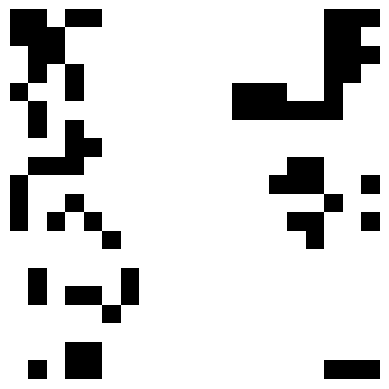

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def initialize_grid(size, density=0.2):
    """ランダムに初期グリッドを生成"""
    return np.random.choice([0, 1], size=(size, size), p=[1 - density, density])

def count_neighbors(grid, x, y):
    """セル(x, y)の近傍の生存セル数をカウント"""
    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),          (0, 1),
        (1, -1), (1, 0), (1, 1),
    ]
    count = 0
    for dx, dy in neighbors:
        nx, ny = (x + dx) % grid.shape[0], (y + dy) % grid.shape[1]
        count += grid[nx, ny]
    return count

def update_grid(grid):
    """次の世代のグリッドを計算"""
    new_grid = grid.copy()
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            neighbors = count_neighbors(grid, x, y)
            if grid[x, y] == 1:
                if neighbors < 2 or neighbors > 3:
                    new_grid[x, y] = 0  # 過疎または過密で死亡
            elif grid[x, y] == 0:
                if neighbors == 3:
                    new_grid[x, y] = 1  # 誕生
    return new_grid

def animate_colab(grid, steps=100):
    """アニメーションをColabで直接表示"""
    fig, ax = plt.subplots()
    img = ax.imshow(grid, cmap="binary")
    ax.axis('off')

    def update(frame):
        nonlocal grid
        grid = update_grid(grid)
        img.set_data(grid)
        return img,

    ani = animation.FuncAnimation(fig, update, frames=steps, interval=200, blit=True)
    return ani

# グリッドのサイズと初期化
size = 20
grid = initialize_grid(size)

# アニメーションの生成
ani = animate_colab(grid, steps=50)

# Colabでアニメーションを直接表示
HTML(ani.to_jshtml())


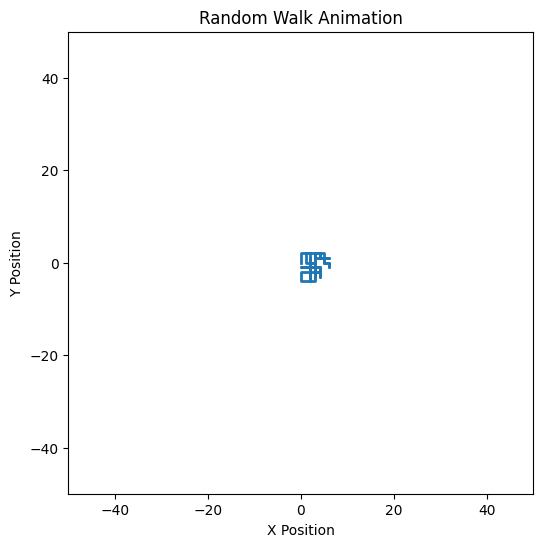

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# ランダムウォークの設定
num_steps = 100  # ステップ数
x, y = [0], [0]  # 初期位置

# ランダムウォークのステップ計算
def random_walk(i):
    dx, dy = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])
    x.append(x[-1] + dx)
    y.append(y[-1] + dy)
    line.set_data(x, y)
    return line,

# プロット設定
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-num_steps // 2, num_steps // 2)
ax.set_ylim(-num_steps // 2, num_steps // 2)
ax.set_title("Random Walk Animation")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
line, = ax.plot([], [], lw=2)

# アニメーションの設定
ani = FuncAnimation(fig, random_walk, frames=num_steps, interval=100, blit=True)

# アニメーションの表示
from IPython.display import HTML
HTML(ani.to_jshtml())


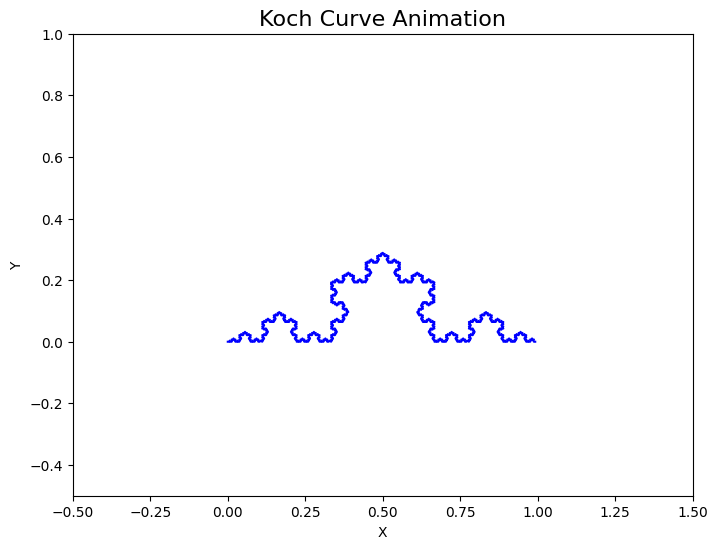

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# コッホ曲線を生成する関数
def koch_curve(start, end, depth):
    if depth == 0:
        return [start, end]

    start = np.array(start)
    end = np.array(end)

    # 3等分点を計算
    point1 = start + (end - start) / 3
    point2 = start + (end - start) * 2 / 3

    # 正三角形の頂点を計算
    angle = np.pi / 3
    point3 = point1 + np.array([
        np.cos(angle) * (point2 - point1)[0] - np.sin(angle) * (point2 - point1)[1],
        np.sin(angle) * (point2 - point1)[0] + np.cos(angle) * (point2 - point1)[1],
    ])

    # 再帰的に分割
    return (
        koch_curve(start, point1, depth - 1) +
        koch_curve(point1, point3, depth - 1) +
        koch_curve(point3, point2, depth - 1) +
        koch_curve(point2, end, depth - 1)[:-1]  # 最後の重複を削除
    )

# フラクタルの描画を準備
depths = 5  # 再帰の最大深さ
frames = []  # フレームデータを保持

for depth in range(depths + 1):
    points = koch_curve([0, 0], [1, 0], depth)
    x, y = zip(*points)
    frames.append((x, y))

# アニメーションの描画設定
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1)
ax.set_title("Koch Curve Animation", fontsize=16)
ax.set_xlabel("X")
ax.set_ylabel("Y")
line, = ax.plot([], [], color="blue")

def update(frame):
    x, y = frames[frame]
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=len(frames), interval=1000, blit=True)

# アニメーションを表示
from IPython.display import HTML
HTML(ani.to_jshtml())
